<a href="https://colab.research.google.com/github/Carol-Kelly/some-works/blob/main/U_S_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **U.S. Hospital Customer Satisfaction 2016-2020**

#### **Problem Statement**
*   To answer the question: is Patient satisfaction correlated with overall hospital performance'?
*   Also, to build and deploy a model that predicts the overall rating of participating hospitals in the United States. 

#### **Data Source**
This dataset was downloaded from Kaggle

In [1]:
# installing kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# creating a directory named .kaggle
!mkdir ~/.kaggle

In [3]:
# copy of the “kaggle.json” file from the mounted google drive to the current instance storage.
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

#### **Data Collection**

In [4]:
# Downloading the dataset from kaggle website
!kaggle datasets download --force abrambeyer/us-hospital-customer-satisfaction-20162020

 80% 33.0M/41.0M [00:00<00:00, 104MB/s] 
100% 41.0M/41.0M [00:00<00:00, 112MB/s]


In [5]:
# extract the data from the zip file
!unzip /content/us-hospital-customer-satisfaction-20162020.zip

Archive:  /content/us-hospital-customer-satisfaction-20162020.zip
  inflating: cms_hospital_patient_satisfaction_2016.csv  
  inflating: cms_hospital_patient_satisfaction_2017.csv  
  inflating: cms_hospital_patient_satisfaction_2018.csv  
  inflating: cms_hospital_patient_satisfaction_2019.csv  
  inflating: cms_hospital_patient_satisfaction_2020.csv  


In [6]:
# import of relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
# import the csv files
pd.set_option('display.max_columns', None)
df_16 = pd.read_csv('/content/cms_hospital_patient_satisfaction_2016.csv')
df_17 = pd.read_csv('/content/cms_hospital_patient_satisfaction_2017.csv')
df_18 = pd.read_csv('/content/cms_hospital_patient_satisfaction_2018.csv')
df_19 = pd.read_csv('/content/cms_hospital_patient_satisfaction_2019.csv')
df_20 = pd.read_csv('/content/cms_hospital_patient_satisfaction_2020.csv')

In [8]:
df_16.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,65,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",Not Applicable,NaN,23,NaN,Not Applicable,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,1213,NaN,27,NaN,04/01/2015,03/31/2016,2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National a

In [9]:
df_20.tail()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
442582,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_DY,"Patients who reported YES, they would definite...","""YES"", patients would definitely recommend the...",Not Applicable,NaN,Not Available,19.0,Not Applicable,Not Available,19,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442583,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",Not Applicable,NaN,Not Available,19.0,Not Applicable,Not Available,19,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442584,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,Recommend hospital - linear mean score,Not Applicable,NaN,Not Applicable,NaN,Not Available,Not Available,19,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442585,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_STAR_RATING,Recommend hospital - star rating,Recommend hospital - star rating,Not Available,19.0,Not Applicable,NaN,Not Applicable,Not Available,19,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
442586,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_STAR_RATING,Summary star rating,Summary star rating,Not Available,19.0,Not Applicable,NaN,Not Applicable,Not Available,19,Not Available,19,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0


#### **Data Wrangling**

In [10]:
# unionizing all the dataframes
df = pd.concat([df_16, df_17, df_18, df_19, df_20], axis=0).reset_index(drop=True)

In [11]:
# view first entries of all the dataframes joined
df.groupby('Year').first()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,15 - The number of cases/patients is too few t...,Not Applicable,6 - Fewer than 100 patients completed the HCAH...,Not Applicable,1213,6 - Fewer than 100 patients completed the HCAH...,27,6 - Fewer than 100 patients completed the HCAH...,04/01/2015,03/31/2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,There are too few measures or measure groups r...,Same as the National average,Results are not available for this reporting p...,Above the National average,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...,Below the National average,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...
2017,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,15 - The number of cases/patients is too few t...,Not Applicable,11 - There were discrepancies in the data coll...,Not Applicable,1332,11 - There were discrepancies in the data coll...,25,11 - There were discrepancies in the data coll...,01/01/2016,12/31/2016,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,There are too few measures or measure groups r...,Same as the national average,Results are not available for this reporting p...,Above the national average,Results are not available for this reporting p...,Same as the national average,Results are not available for this reporting p...,Below the national average,Results are not available for this reporting p...,Same as the national average,Data are shown only for hospitals that partici...,Same as the national average,Data are shown only for hospitals that partici...,Same as the national average,Results are not available for this reporting p...
2018,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,2,15 - The number of cases/patients is too few t...,Not Applicable,6 - Fewer than 100 patients completed the HCAH...,Not Applicable,463,6 - Fewer than 100 patients completed the HCAH...,20,6 - Fewer than 100 patients completed the HCAH...,01/01/2017,12/31/2017,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,There are too few measures or measure groups r...,Same as the national average,Resul

From the above table, it can be seen that a particular hospital (Southeast Alabama Medical Center) `hospital overall rating` declined from 2019 against the stability in the earlier years. Therefore the facility name and year of rating are important in this dataset. 

In [12]:
# change column names to lower case for better parsing
df.columns = [i.strip().lower().replace(" ", "_") for i in df.columns]
df.columns

Index(['facility_id', 'facility_name', 'address', 'city', 'state', 'zip_code',
       'county_name', 'phone_number', 'hcahps_measure_id', 'hcahps_question',
       'hcahps_answer_description', 'patient_survey_star_rating',
       'patient_survey_star_rating_footnote', 'hcahps_answer_percent',
       'hcahps_answer_percent_footnote', 'hcahps_linear_mean_value',
       'number_of_completed_surveys', 'number_of_completed_surveys_footnote',
       'survey_response_rate_percent', 'survey_response_rate_percent_footnote',
       'start_date', 'end_date', 'year', 'hospital_type', 'hospital_ownership',
       'emergency_services',
       'meets_criteria_for_promoting_interoperability_of_ehrs',
       'hospital_overall_rating', 'hospital_overall_rating_footnote',
       'mortality_national_comparison',
       'mortality_national_comparison_footnote',
       'safety_of_care_national_comparison',
       'safety_of_care_national_comparison_footnote',
       'readmission_national_comparison',
      

In [13]:
df.shape

(1653683, 43)

 *   In the `df_20.tail()` table, it can be seen that `hospital overall rating` has 'Not Available' entries even though there are no missing values. Therefore, a new data frame will be created that will contain only hospitals that were surveyed in all five years (df_16 - df_20) and have a rating from 1 to 5.

 

In [14]:
df['na_flag'] = (
     df['hospital_overall_rating'].eq('Not Available')
)
df['na_flag']

0          False
1          False
2          False
3          False
4          False
           ...  
1653678     True
1653679     True
1653680     True
1653681     True
1653682     True
Name: na_flag, Length: 1653683, dtype: bool

In [15]:
transformed_df = df.loc[
    (df.groupby('facility_name')['year']
                     .transform('nunique').eq(5)) &
    (df.groupby('facility_name')['na_flag']
                     .transform('max').eq(0))
]
transformed_df = transformed_df.reset_index(drop=True)

In [16]:
print('Dimension of transformed Data frame:', transformed_df.shape)

Dimension of transformed Data frame: (882446, 44)


In [17]:
transformed_df.tail()

,facility_id,facility_name,address,city,state,zip_code,county_name,phone_number,hcahps_measure_id,hcahps_question,hcahps_answer_description,patient_survey_star_rating,patient_survey_star_rating_footnote,hcahps_answer_percent,hcahps_answer_percent_footnote,hcahps_linear_mean_value,number_of_completed_surveys,number_of_completed_surveys_footnote,survey_response_rate_percent,survey_response_rate_percent_footnote,start_date,end_date,year,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_promoting_interoperability_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,na_flag
882441,670098,RESOLUTE HEALTH HOSPITAL,"555 CREEKSIDE XING,",NEW BRAUNFELS,TX,78130,COMAL,(469) 839-6778,H_RECMND_DY,"Patients who reported YES, they would definite...","""YES"", patients would definitely recommend the...",Not Applicable,NaN,81,NaN,Not Applicable,485,NaN,16,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Y,4,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,False
882442,670098,RESOLUTE HEALTH HOSPITAL,"555 CREEKSIDE XING,",NEW BRAUNFELS,TX,78130,COMAL,(469) 839-6778,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",Not Applicable,NaN,16,NaN,Not Applicable,485,NaN,16,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Y,4,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,False
882443,670098,RESOLUTE HEALTH HOSPITAL,"555 CREEKSIDE XING,",NEW BRAUNFELS,TX,78130,COMAL,(469) 839-6778,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,Recommend hospital - linear mean score,Not Applicable,NaN,Not Applicable,NaN,92,485,NaN,16,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Y,4,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,False
882444,670098,RESOLUTE HEALTH HOSPITAL,"555 CREEKSIDE XING,",NEW BRAUNFELS,TX,78130,COMAL,(469) 839-6778,H_RECMND_STAR_RATING,Recommend hospital - star rating,Recommend hospital - star rating,4,NaN,Not Applicable,NaN,Not Applicable,485,NaN,16,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Y,4,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,False
882445,670098,RESOLUTE HEALTH HOSPITAL,"555 CREEKSIDE XING,",NEW BRAUNFELS,TX,78130,COMAL,(469) 839-6778,H_STAR_RATING,Summary star rating,Summary star rating,4,NaN,Not Applicable,NaN,Not Applicable,485,NaN,16,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Proprietary,Yes,Y,4,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national a

In [18]:
# check the unique values of hospital_overall_rating 
transformed_df['hospital_overall_rating'].unique()

array(['3', '2', '4', '5', '1'], dtype=object)

#### **Data Cleaning**

In [19]:
# check for duplicate values
transformed_df.duplicated().any()

False

In [20]:
# check for missing values
transformed_df.isna().sum()

facility_id                                                           0
facility_name                                                         0
address                                                               0
city                                                                  0
state                                                                 0
zip_code                                                              0
county_name                                                         480
phone_number                                                          0
hcahps_measure_id                                                     0
hcahps_question                                                       0
hcahps_answer_description                                             0
patient_survey_star_rating                                            0
patient_survey_star_rating_footnote                              873440
hcahps_answer_percent                                           

In [21]:
unuseful_cols = [i for i in transformed_df.columns if 'footnote' in i]
unuseful_cols += ['address', 'zip_code', 'county_name', 'phone_number', 'hcahps_measure_id', 'na_flag']
unuseful_cols

['patient_survey_star_rating_footnote',
 'hcahps_answer_percent_footnote',
 'number_of_completed_surveys_footnote',
 'survey_response_rate_percent_footnote',
 'hospital_overall_rating_footnote',
 'mortality_national_comparison_footnote',
 'safety_of_care_national_comparison_footnote',
 'readmission_national_comparison_footnote',
 'patient_experience_national_comparison_footnote',
 'effectiveness_of_care_national_comparison_footnote',
 'timeliness_of_care_national_comparison_footnote',
 'efficient_use_of_medical_imaging_national_comparison_footnote',
 'address',
 'zip_code',
 'county_name',
 'phone_number',
 'hcahps_measure_id',
 'na_flag']

In [22]:
transformed_df.drop(columns=unuseful_cols, axis=1, inplace=True)

In [23]:
# check for unique values in 'Meets criteria for promoting interoperability of EHRs' column
transformed_df['meets_criteria_for_promoting_interoperability_of_ehrs'].unique()

array(['Y', nan], dtype=object)

In [24]:
# filling the 'Meets criteria for promoting interoperability of EHRs' column
transformed_df['meets_criteria_for_promoting_interoperability_of_ehrs'] = transformed_df['meets_criteria_for_promoting_interoperability_of_ehrs'].replace(np.nan, 'NaN')

In [25]:
transformed_df['meets_criteria_for_promoting_interoperability_of_ehrs'].isnull().sum()

0

In [26]:
def df_vals(dera):
    insite_df = pd.DataFrame(index=["unique_values", "dtype", "null_values"])
    for col in dera.columns:
        insite_df[col] = [dera[col].nunique(), dera[col].dtype, dera[col].isna().sum()]
        
    return insite_df.T

df_vals(transformed_df)

,unique_values,dtype,null_values
facility_id,4488,object,0
facility_name,2449,object,0
city,1755,object,0
state,52,object,0
hcahps_question,100,object,0
hcahps_answer_description,101,object,0
patient_survey_star_rating,7,object,0
hcahps_answer_percent,103,object,0
hcahps_linear_mean_value,49,object,0
number_of_completed_surveys,2718,object,0


#### **Exploratory Data Analysis**

In [27]:
# Descriptive statistics of the dataset
transformed_df.describe(include='all')

,facility_id,facility_name,city,state,hcahps_question,hcahps_answer_description,patient_survey_star_rating,hcahps_answer_percent,hcahps_linear_mean_value,number_of_completed_surveys,survey_response_rate_percent,start_date,end_date,year,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_promoting_interoperability_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison
count,882446.0,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446.000000,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446,882446
unique,4488.0,2449,1755,52,100,101,7,103,49,2718,62,5,5,NaN,2,10,2,2,5,7,7,7,7,7,7,7
top,450586.0,GOOD SAMARITAN HOSPITAL,CHICAGO,CA,Summary star rating,Summary star rating,Not Applicable,Not Applicable,Not Applicable,Not Available,25,01/01/2018,12/31/2018,NaN,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,Same as the national average,Above the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average
freq,346.0,2236,7958,83040,12762,12762,736943,278244,749705,8041,49288,236871,236871,NaN,750207,401845,850820,829168,327954,541925,240852,280217,239564,619349,275204,446556
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.324820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882446 entries, 0 to 882445
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   facility_id                                            882446 non-null  object
 1   facility_name                                          882446 non-null  object
 2   city                                                   882446 non-null  object
 3   state                                                  882446 non-null  object
 4   hcahps_question                                        882446 non-null  object
 5   hcahps_answer_description                              882446 non-null  object
 6   patient_survey_star_rating                             882446 non-null  object
 7   hcahps_answer_percent                                  882446 non-null  object
 8   hcahps_linear_mean_value                    

In [29]:
# check for columns that meant to be numeric
numeric_cols = transformed_df[['number_of_completed_surveys','survey_response_rate_percent','patient_survey_star_rating',
                               'hcahps_linear_mean_value','hcahps_answer_percent','hospital_overall_rating']]                   

In [30]:
for i in numeric_cols:
  # prints without truncating
  with np.printoptions(threshold=np.inf):
    print(f"{i:20} --> {transformed_df[i].nunique()} ==> {transformed_df[i].unique()}\n\n")

number_of_completed_surveys --> 2718 ==> ['1213' '203' '74' '506' '1063' '226' '1224' '1520' '5873' '299' '1143'
 '586' '3087' '2019' '104' '193' '820' '532' '232' '978' '3480' '97' '347'
 '189' '216' '107' '1737' '574' '968' '258' '609' '1184' '129' '1306'
 '109' '304' '1317' '352' '1082' '1356' '607' '50' '195' '1588' '939'
 '430' '271' '309' '397' '380' '818' '280' '825' '242' '351' '538' '321'
 '337' '188' '1921' '590' '186' '735' '1093' '277' '1178' '410' '2518'
 '3015' '680' '1043' '1338' '1091' '994' '1385' '3729' '1118' '3834'
 '1374' '1305' '424' '625' '1464' '605' '2694' '372' '488' '452' '690'
 '311' '1888' '3428' '2297' '1631' '1707' '477' '1297' '707' '559' '634'
 '3350' '320' '2473' '1038' '1413' '610' '608' '198' '350' '330' '2715'
 '1824' '1445' '102' '937' '163' '882' '613' '381' '3028' '1750' '618'
 '1569' '642' '542' '72' '313' '267' '2506' '246' '136' '1266' '261' '357'
 '178' '600' '729' '335' '3497' '696' '1432' '265' '190' 'Not Available'
 '79' '211' '89' '185' '

In [31]:
transformed_df['number_of_completed_surveys'].replace('Not Available', 0, inplace=True)
transformed_df['number_of_completed_surveys'].replace('FEWER THAN 50', 49, inplace=True)
transformed_df['number_of_completed_surveys'] = pd.to_numeric(transformed_df['number_of_completed_surveys'])

In [32]:
transformed_df['survey_response_rate_percent'].replace('Not Available', 0, inplace=True)
transformed_df['survey_response_rate_percent'] = pd.to_numeric(transformed_df['survey_response_rate_percent'])

In [33]:
# convert date columns from string to datetime data type
transformed_df['start_date'] = pd.to_datetime(transformed_df['start_date'])
transformed_df['end_date'] = pd.to_datetime(transformed_df['end_date'])
# create a new column duration
transformed_df['duration_in_days'] = transformed_df['end_date'].sub(transformed_df['start_date'], axis=0)
transformed_df['duration_in_days']

0        365 days
1        365 days
2        365 days
3        365 days
4        365 days
           ...   
882441   364 days
882442   364 days
882443   364 days
882444   364 days
882445   364 days
Name: duration_in_days, Length: 882446, dtype: timedelta64[ns]

Most duration for survey lasted for about a year, therefore the start and end dates will not be used further.

In [34]:
# check the unique values of some object columns in order to encode appropriately
obj_cols = transformed_df[['facility_name','hospital_type','hospital_ownership','state','emergency_services','hcahps_answer_description',
               'meets_criteria_for_promoting_interoperability_of_ehrs','mortality_national_comparison',
               'safety_of_care_national_comparison','readmission_national_comparison','patient_experience_national_comparison',
               'effectiveness_of_care_national_comparison','timeliness_of_care_national_comparison',
               'efficient_use_of_medical_imaging_national_comparison']]

In [35]:
for i in obj_cols:
    print(f"{i:20} --> {transformed_df[i].nunique()} ==> {transformed_df[i].unique()[-20:]}\n\n")

facility_name        --> 2449 ==> ['STAR VALLEY MEDICAL CENTER' 'ST MARKS MEDICAL CENTER'
 'THE HOSPITAL AT WESTLAKE MEDICAL CENTER'
 'METHODIST MANSFIELD MEDICAL CENTER' 'SETON MEDICAL CENTER WILLIAMSON'
 'CEDAR PARK REGIONAL MEDICAL CENTER'
 'TEXAS HEALTH PRESBYTERIAN HOSPITAL ROCKWALL'
 "ST LUKE'S SUGAR LAND HOSPITAL" 'METHODIST STONE OAK HOSPITAL'
 'BAYLOR SCOTT AND WHITE MEDICAL CENTER SUNNYVALE'
 'SOUTH TEXAS SURGICAL HOSPITAL'
 'TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND'
 'TEXAS HEALTH HEART & VASCULAR HOSPITAL ARLINGTON'
 "ST LUKE'S HOSPITAL AT THE VINTAGE" 'BAPTIST EMERGENCY HOSPITAL'
 'SETON MEDICAL CENTER HARKER HEIGHTS'
 'BAYLOR SCOTT AND WHITE  MEDICAL CENTER  MCKINNEY'
 'TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE'
 'BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE STATI'
 'RESOLUTE HEALTH HOSPITAL']


hospital_type        --> 2 ==> ['Acute Care Hospitals' 'Critical Access Hospitals']


hospital_ownership   --> 10 ==> ['Government - Hospital District or Authority'
 

**It can be seen that strings in some columns were repeated because of the format in which they appear. These will be normalized to eliminate redundancy.**

In [36]:
transformed_df[obj_cols.columns] = transformed_df[obj_cols.columns].apply(lambda x: x.str.lower().str.strip())                                             

In [37]:
for i in transformed_df[obj_cols.columns]:
    print(f"{i:20} --> {transformed_df[i].nunique()} ==> {transformed_df[i].unique()[:]}\n\n")

facility_name        --> 2449 ==> ['southeast alabama medical center' 'mizell memorial hospital'
 'crenshaw community hospital' ...
 'texas health harris methodist hospital alliance'
 'baylor scott & white medical center- college stati'
 'resolute health hospital']


hospital_type        --> 2 ==> ['acute care hospitals' 'critical access hospitals']


hospital_ownership   --> 10 ==> ['government - hospital district or authority'
 'voluntary non-profit - private' 'proprietary' 'government - state'
 'voluntary non-profit - other' 'government - local'
 'voluntary non-profit - church' 'government - federal' 'tribal'
 'physician']


state                --> 52 ==> ['al' 'ak' 'az' 'ar' 'ca' 'co' 'ct' 'de' 'dc' 'fl' 'ga' 'hi' 'id' 'il'
 'in' 'ia' 'ks' 'ky' 'la' 'me' 'ma' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv'
 'nh' 'nj' 'nm' 'ny' 'nc' 'nd' 'oh' 'ok' 'or' 'pa' 'pr' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'vt' 'vi' 'va' 'wa' 'wv' 'wi' 'wy']


emergency_services   --> 2 ==> ['yes' 'no']


hcahps_answer_descr

In [38]:
ownership=[]
for x in transformed_df['hospital_ownership'].unique():
    ownership.append(transformed_df[transformed_df['hospital_ownership']==x]['facility_name'].nunique())

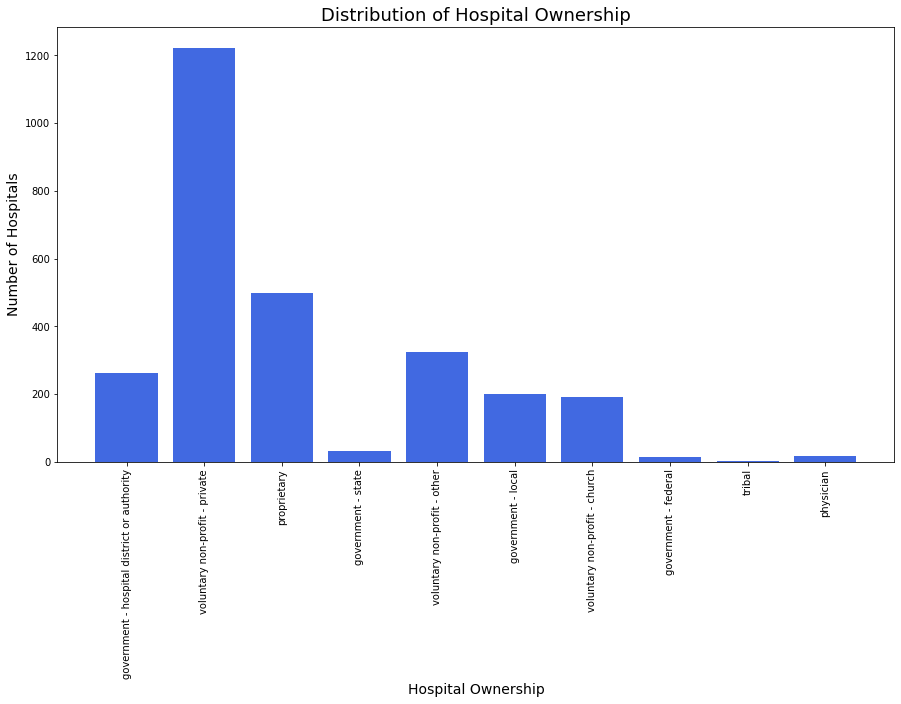

In [39]:
plt.figure(figsize=(15,8))
plt.bar(x=transformed_df['hospital_ownership'].unique(), height=ownership, color='royalblue')
plt.xlabel('Hospital Ownership', fontsize=14)
plt.ylabel('Number of Hospitals', fontsize=14)
plt.xticks(ticks=transformed_df['hospital_ownership'].unique(), rotation=90)
plt.title('Distribution of Hospital Ownership', fontsize=18)
plt.show()

In [40]:
hos_type=[]
for x in transformed_df['hospital_type'].unique():
    hos_type.append(transformed_df[transformed_df['hospital_type']==x]['facility_name'].nunique())

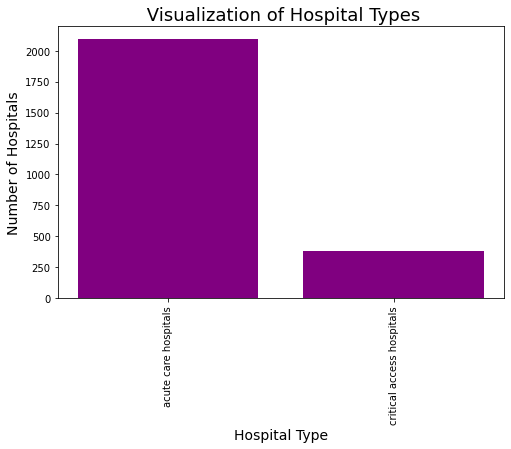

In [41]:
plt.figure(figsize=(8,5))
plt.bar(x=transformed_df['hospital_type'].unique(), height=hos_type, color='purple')
plt.xlabel('Hospital Type', fontsize=14)
plt.ylabel('Number of Hospitals', fontsize=14)
plt.xticks(ticks=transformed_df['hospital_type'].unique(), rotation=90)
plt.title(' Visualization of Hospital Types', fontsize=18)
plt.show()

In [42]:
states=[]
for x in transformed_df['state'].unique():
    states.append(transformed_df[transformed_df['state']==x]['facility_name'].nunique())

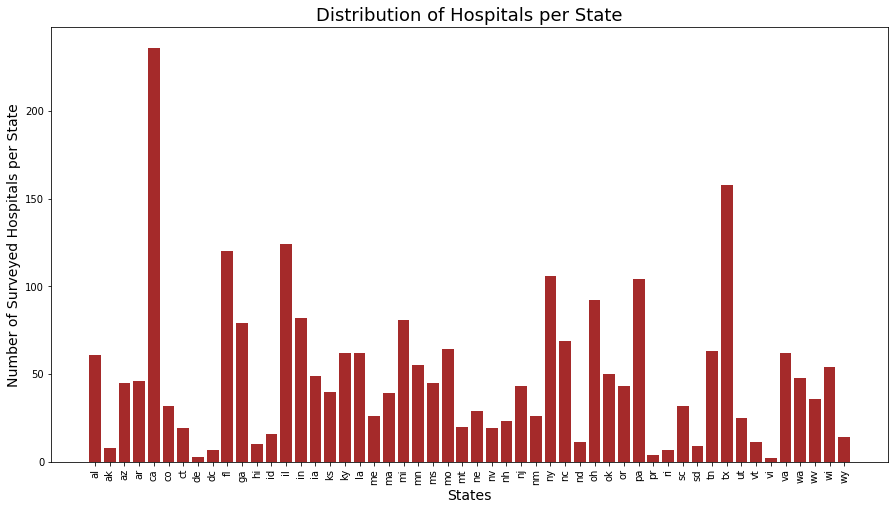

In [43]:
plt.figure(figsize=(15,8))
plt.bar(x=transformed_df['state'].unique(), height=states, color='brown')
plt.xlabel('States', fontsize=14)
plt.ylabel('Number of Surveyed Hospitals per State', fontsize=14)
plt.xticks(ticks=transformed_df['state'].unique(), rotation=90)
plt.title('Distribution of Hospitals per State', fontsize=18)
plt.show()

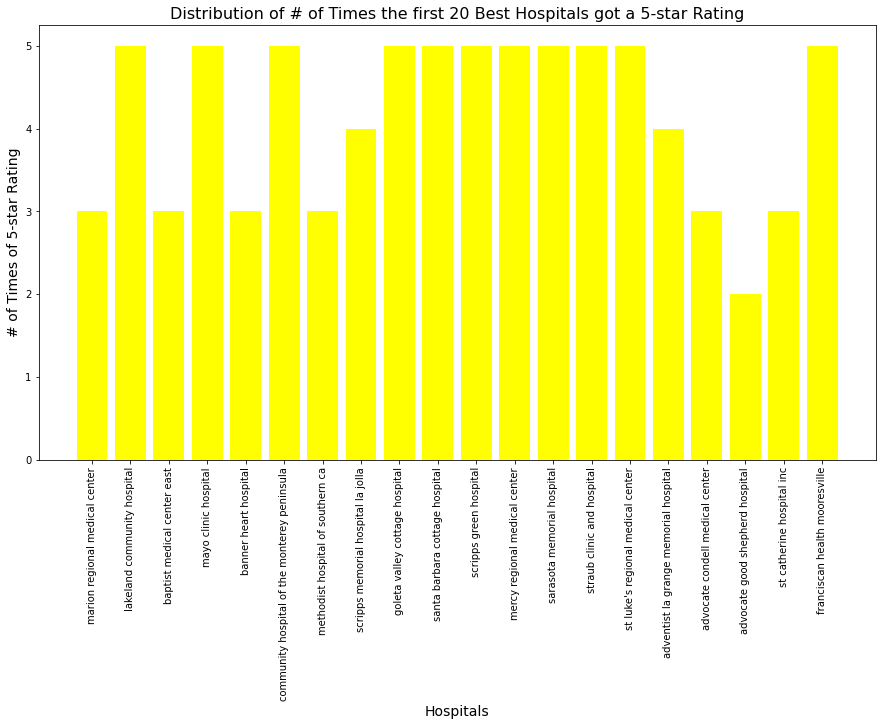

In [44]:
transformed_df['best'] = pd.Series(transformed_df[transformed_df['hospital_overall_rating'].eq('5')]['facility_name'].unique())

# create a DataFrame of the top 20 hospitals
top_hospitals = pd.DataFrame(transformed_df['best'].dropna().unique()[:20], columns=['facility_name'])

# create a list of the number of unique years each hospital received a 5-star rating
best_hospitals = []
for hospital in top_hospitals['facility_name']:
    num_years = transformed_df[(transformed_df['facility_name']==hospital) & (transformed_df['hospital_overall_rating']=='5')]['year'].nunique()
    best_hospitals.append(num_years)

# create a bar chart of the top hospitals
plt.figure(figsize=(15,8))
plt.bar(x=top_hospitals['facility_name'], height=best_hospitals, color='yellow')
plt.xlabel('Hospitals', fontsize=14)
plt.ylabel('# of Times of 5-star Rating', fontsize=14)
plt.xticks(rotation=90)
plt.title('Distribution of # of Times the first 20 Best Hospitals got a 5-star Rating', fontsize=16)
plt.show()

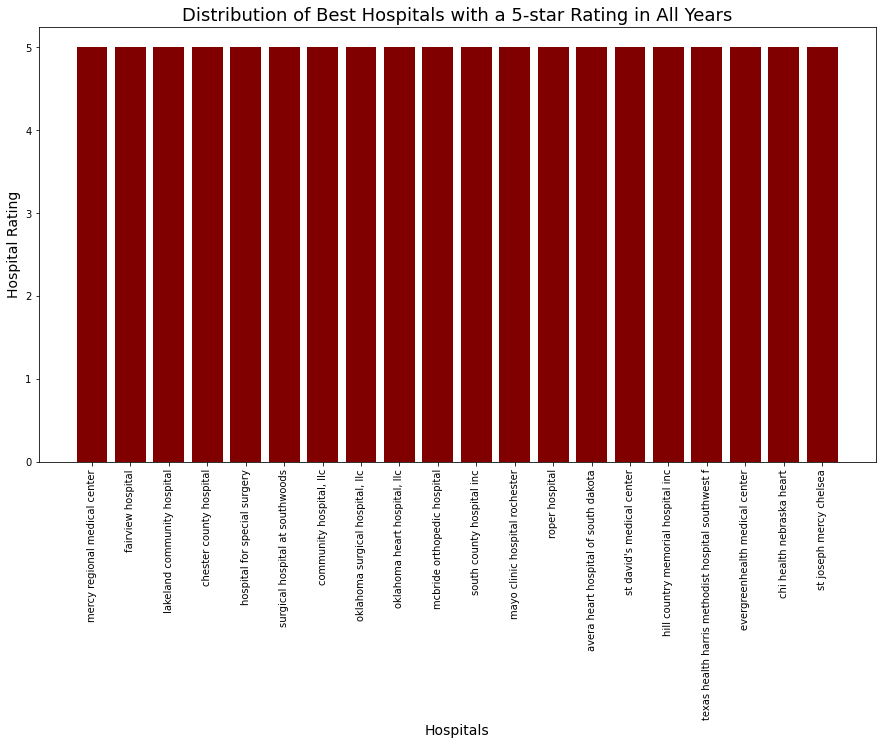

In [45]:
# create a DataFrame of the hospitals with a 5-star rating in all years
all_5_star_hospitals = transformed_df[transformed_df['hospital_overall_rating']=='5'].groupby('facility_name').filter(
    lambda x: x['year'].nunique() == transformed_df['year'].nunique())

top_hospitals = all_5_star_hospitals['facility_name'].value_counts().head(20).index.to_list()

# create a list of the number of unique years each hospital received a 5-star rating
best_hospitals = []
for hospital in top_hospitals:
    num_years = all_5_star_hospitals[all_5_star_hospitals['facility_name']==hospital]['year'].nunique()
    best_hospitals.append(num_years)

# create a bar chart of the top hospitals with a 5-star rating in all years
plt.figure(figsize=(15,8))
plt.bar(x=top_hospitals, height=best_hospitals, color='maroon')
plt.xlabel('Hospitals', fontsize=14)
plt.ylabel('Hospital Rating', fontsize=14)
plt.xticks(rotation=90)
plt.title('Distribution of Best Hospitals with a 5-star Rating in All Years', fontsize=18)
plt.show()

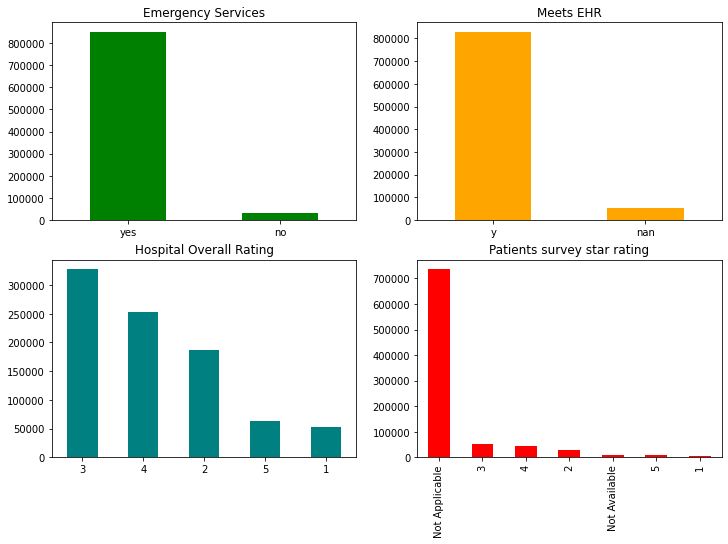

In [46]:
plt.subplot(221)
transformed_df['emergency_services'].value_counts().plot(kind='bar', color='green', title='Emergency Services', figsize=(12, 8))
plt.xticks(rotation=360)
plt.subplot(222)
transformed_df['meets_criteria_for_promoting_interoperability_of_ehrs'].value_counts().plot(kind='bar', title='Meets EHR', color='orange')
plt.xticks(rotation=360)
plt.subplot(223)
transformed_df['hospital_overall_rating'].value_counts().plot(kind='bar', title='Hospital Overall Rating', color='teal')
plt.xticks(rotation=360)
plt.subplot(224)
transformed_df['patient_survey_star_rating'].value_counts().plot(kind='bar', title='Patients survey star rating', color='red')
plt.xticks(rotation=90)

plt.show()

**So most of the hospitals were private voluntary non-profit acute care Hospitals with emergency services and meets criteria for interoperability of electronic health records. Mostly having a not applicable patients' survey star rating and an overall rating of 3; California being the highest participatory state of the survey in the United States.**

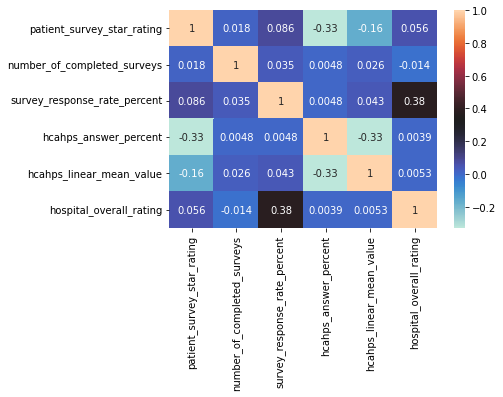

In [47]:
# creating dummies and converting data types
transformed_df['patient_survey_star_rating'] = transformed_df['patient_survey_star_rating'].replace(['Not Applicable','Not Available'], 0).astype(int)
transformed_df['hcahps_linear_mean_value'] = transformed_df['hcahps_linear_mean_value'].replace(['Not Applicable','Not Available'], 0).astype(int)
transformed_df['hcahps_answer_percent'] = transformed_df['hcahps_answer_percent'].replace(['Not Applicable','Not Available'], 0).astype(int)
transformed_df['hospital_overall_rating'] = transformed_df['hospital_overall_rating'].astype(int)
#transformed_df['meets_criteria_for_promoting_interoperability_of_ehrs'].replace(['empty','not available'], 'n', inplace=True)

# check for correlation of numerical features
features = transformed_df[['patient_survey_star_rating','number_of_completed_surveys','survey_response_rate_percent',
           'hcahps_answer_percent','hcahps_linear_mean_value','hospital_overall_rating']]

sns.heatmap(features.corr(), annot=True, cmap='icefire')

Patients' satisfaction is represented by `patient_survey_star_rating` and it is not correlated with Hospital overall rating as seen from the visualization above.

In [48]:
max_val1 = max(transformed_df['number_of_completed_surveys'])
max_val2 = max(transformed_df.survey_response_rate_percent)
print(f'Maximum no completed surveys is {max_val1} and Response rate percent is {max_val2}')

Maximum no completed surveys is 11863 and Response rate percent is 68


In [49]:
# Check for Multicollinearity among quantitative variables
# the independent quantitative variables set
quants = transformed_df[['patient_survey_star_rating','number_of_completed_surveys','survey_response_rate_percent',
           'hcahps_answer_percent','hcahps_linear_mean_value']]

# VIF dataframe
vif = pd.DataFrame()
vif['variable'] = quants.columns

# calculating VIF for each feature
vif['VIF'] = [variance_inflation_factor(quants.values, i) for i in range(len(quants.columns))]

print(vif)

                       variable       VIF
0    patient_survey_star_rating  1.418391
1   number_of_completed_surveys  1.699778
2  survey_response_rate_percent  3.302702
3         hcahps_answer_percent  2.043342
4      hcahps_linear_mean_value  1.394642


Since there is no problem of collinearity between variables and multicollinearity among the numeric variables, they will all be used for modelling

In [50]:
# convert some columns back to their original data type 
transformed_df[['patient_survey_star_rating','year']] = transformed_df[['patient_survey_star_rating','year']].astype(str)

####**Feature Engineering**

In [51]:
new_df = transformed_df[['number_of_completed_surveys','hcahps_linear_mean_value','survey_response_rate_percent','hcahps_answer_percent',
                         'patient_survey_star_rating','facility_name','year','hospital_type','hospital_ownership','emergency_services',
                         'meets_criteria_for_promoting_interoperability_of_ehrs','state','mortality_national_comparison',
                         'safety_of_care_national_comparison','readmission_national_comparison','patient_experience_national_comparison',
                         'effectiveness_of_care_national_comparison','timeliness_of_care_national_comparison',
                         'efficient_use_of_medical_imaging_national_comparison','hospital_overall_rating']]                           

In [52]:
# dependent and independent feature
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [53]:
# check for class imbalance
y.value_counts()

3    327954
4    253134
2    186463
5     62483
1     52412
Name: hospital_overall_rating, dtype: int64

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882446 entries, 0 to 882445
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   number_of_completed_surveys                            882446 non-null  int64 
 1   hcahps_linear_mean_value                               882446 non-null  int64 
 2   survey_response_rate_percent                           882446 non-null  int64 
 3   hcahps_answer_percent                                  882446 non-null  int64 
 4   patient_survey_star_rating                             882446 non-null  object
 5   facility_name                                          882446 non-null  object
 6   year                                                   882446 non-null  object
 7   hospital_type                                          882446 non-null  object
 8   hospital_ownership                          

In [55]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(f'Train size: \nxtrain: {X_train.shape}\nytrain: {y_train.shape}',
      f'\n\nTest size: \nxtest: {X_test.shape}\nytest: {y_test.shape}')

Train size: 
xtrain: (705956, 19)
ytrain: (705956,) 

Test size: 
xtest: (176490, 19)
ytest: (176490,)


In [56]:
#categorical = list(X_train.select_dtypes('category').columns)
# numerical = list(X_train.select_dtypes('number').columns)
# differentiate categorical from numerical variables
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print(cat_cols)
print(num_cols)

['patient_survey_star_rating', 'facility_name', 'year', 'hospital_type', 'hospital_ownership', 'emergency_services', 'meets_criteria_for_promoting_interoperability_of_ehrs', 'state', 'mortality_national_comparison', 'safety_of_care_national_comparison', 'readmission_national_comparison', 'patient_experience_national_comparison', 'effectiveness_of_care_national_comparison', 'timeliness_of_care_national_comparison', 'efficient_use_of_medical_imaging_national_comparison']
['number_of_completed_surveys', 'hcahps_linear_mean_value', 'survey_response_rate_percent', 'hcahps_answer_percent']


In [57]:
#num_cols = ['number_of_completed_surveys','survey_response_rate_percent','hcahps_answer_percent','hcahps_linear_mean_value']
# Feature engineering for numerical data
numeric_transformer = Pipeline(steps=[('scale', MinMaxScaler())])

# Feature engineering for categorical data
# to avoid computational inefficiency
cat_transformer = Pipeline(steps=[('ordinal_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))])

In [58]:
# Preprocessing for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, num_cols),('cat', cat_transformer, cat_cols)])#, sparse_threshold=0, remainder='passthrough', verbose_feature_names_out=False)

#### **Model Building**

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [60]:
# select features to be used by model
estimator = RandomForestClassifier(random_state=42)
selector = SelectFromModel(estimator)
#union = FeatureUnion([('feature_selection', SelectFromModel(LGBMClassifier(boosting_type='gbdt',objective='multiclass')))])

In [61]:
clf = Pipeline(steps=[('preprocessor', preprocessor), ('feature_selection', selector),('classifier', RandomForestClassifier())])

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
print('Accuracy scores:\n', scores)
print(scores.mean(), scores.std())

Accuracy scores:
 [1. 1. 1. 1. 1.]
1.0 0.0


Due to the class imbalance of the hospital overall ratings; accuracy may not be a good metric to access the performance of our algorithm. Therefore, confusion matrix will be used for better assessment. 

#### **Model Evaluation**

In [62]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(multilabel_confusion_matrix(y_test, pred))

[[[165906      0]
  [     0  10584]]

 [[139245      0]
  [     0  37245]]

 [[110381      0]
  [     0  66109]]

 [[126346      0]
  [     0  50144]]

 [[164082      0]
  [     0  12408]]]


In [63]:
print(classification_report(y_test, pred, target_names=['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']))

              precision    recall  f1-score   support

    rating_1       1.00      1.00      1.00     10584
    rating_2       1.00      1.00      1.00     37245
    rating_3       1.00      1.00      1.00     66109
    rating_4       1.00      1.00      1.00     50144
    rating_5       1.00      1.00      1.00     12408

    accuracy                           1.00    176490
   macro avg       1.00      1.00      1.00    176490
weighted avg       1.00      1.00      1.00    176490



The model performs perfectly even with unseen data. Therefore, there won't be any need for hyperparameter tuning.

####**Feature Selection**

In [64]:
#feature_names = np.array(new_df.feature_names)
features_selected = clf.named_steps['feature_selection'].get_support()
features_selected

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False])

In [65]:
# list and count the selected features
selected_feat= X_train.columns[(clf.named_steps['feature_selection'].get_support())]
len(selected_feat)
# get the name of the features selected
print(selected_feat)

Index(['number_of_completed_surveys', 'survey_response_rate_percent',
       'facility_name', 'year', 'state', 'safety_of_care_national_comparison',
       'readmission_national_comparison',
       'patient_experience_national_comparison'],
      dtype='object')


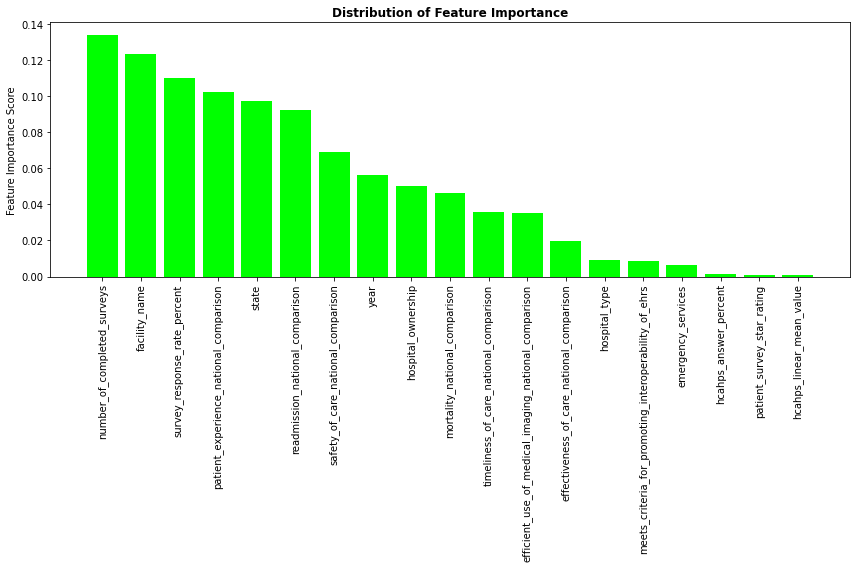

In [66]:
# plot the distribution of importance
feat_impt = pd.Series(clf.named_steps['feature_selection'].estimator_.feature_importances_)
# Sort the feature importance in descending order
sorted_indices = np.argsort(feat_impt)[::-1]

plt.figure(figsize=(12,8))
plt.title('Distribution of Feature Importance', fontweight='bold')
plt.bar(range(X_train.shape[1]), feat_impt[sorted_indices], align='center', color='lime')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()

In [67]:
# parameters used by the model
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

The model upon being 100% accurate, only the features that were selected above is used to retrain the model for deployment purpose. Also a csv file will be exported in order to get the full data for the HTML form. 

In [68]:
X1 = new_df[['number_of_completed_surveys', 'survey_response_rate_percent', 'facility_name', 'year', 'state',
             'safety_of_care_national_comparison', 'readmission_national_comparison', 'patient_experience_national_comparison']]
              
y1 = new_df['hospital_overall_rating']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [69]:
categorical = list(X_train1.select_dtypes(include='object').columns)
numeric = list(X_train1.select_dtypes('number').columns)
print(categorical)
print(numeric)

['facility_name', 'year', 'state', 'safety_of_care_national_comparison', 'readmission_national_comparison', 'patient_experience_national_comparison']
['number_of_completed_surveys', 'survey_response_rate_percent']


In [70]:
numeric_transform = Pipeline(steps=[('scale', MinMaxScaler())])
obj_transform = Pipeline(steps=[('ordinal_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))])

preprocess = ColumnTransformer(
    transformers=[('num', numeric_transform, numeric),('obj', obj_transform, categorical)])

In [71]:
clf1 = Pipeline(steps=[('preprocess', preprocess), ('classifier', RandomForestClassifier())])

clf1.fit(X_train1, y_train1)
new_pred = clf1.predict(X_test1)
print(accuracy_score(y_test1, new_pred))

1.0


#### **Model Deployment**

In [ ]:
# dataset for deployment
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/csv_files/new_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_df.to_csv(filepath, index=False, encoding='utf-8', header=True, columns=new_df.columns)

In [ ]:
import pickle
# save the model to disk
filename = 'hospital_model.pkl'
pickle.dump(clf1, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
result = loaded_model.score(X_test1, y_test1)
result

1.0

In [ ]:
# more efficient on objects that carry large numpy arrays internally, as is the case with this model
#from joblib import dump, load
#dump(clf1, 'ushospital_model.joblib')

['ushospital_model.joblib']

In [ ]:
#load_model = load('ushospital_model.joblib')

In [ ]:
#load_model.predict(X1[0:1])

array([3])

In [ ]:
#y[0]

3